In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/meghanmcgrath/Documents/Instacart Basket Analysis/02 Data'

In [3]:
df_fin = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_ex10_excl.pkl'))

In [4]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 37 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  int64         
 1   first_name               object        
 2   last_name                object        
 3   gender                   object        
 4   state                    object        
 5   age                      int64         
 6   date_joined              datetime64[ns]
 7   dependants               int64         
 8   family_status            object        
 9   income                   int64         
 10  product_id               int64         
 11  product_name             object        
 12  aisle_id                 int64         
 13  department_id            int64         
 14  prices                   float64       
 15  order_id                 int64         
 16  order_number             int64         
 17  orders_day_of_week       int64

In [5]:
df_fin[['income','age','dependants']].describe()

income           age    dependants
count  3.096456e+07  3.096456e+07  3.096456e+07
mean   9.967587e+04  4.946803e+01  1.501819e+00
std    4.314187e+04  1.848528e+01  1.118896e+00
min    2.590300e+04  1.800000e+01  0.000000e+00
25%    6.729200e+04  3.300000e+01  1.000000e+00
50%    9.676500e+04  4.900000e+01  2.000000e+00
75%    1.281020e+05  6.500000e+01  3.000000e+00
max    5.939010e+05  8.100000e+01  3.000000e+00

In [6]:
# Setting thresholds
def income_level(row):
    if row['income'] <= 50000:
        return 'Low income'
    elif (row['income'] > 50000) and (row['income'] <= 100000):
        return 'Medium income'
    elif row['income'] > 100000:
        return 'High income'

In [7]:
df_fin['income_level'] = df_fin.apply(income_level, axis=1)

In [8]:
df_fin['income_level'].value_counts(dropna = False)

income_level
High income      14207028
Medium income    13394982
Low income        3362554
Name: count, dtype: int64

In [9]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 38 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  int64         
 1   first_name               object        
 2   last_name                object        
 3   gender                   object        
 4   state                    object        
 5   age                      int64         
 6   date_joined              datetime64[ns]
 7   dependants               int64         
 8   family_status            object        
 9   income                   int64         
 10  product_id               int64         
 11  product_name             object        
 12  aisle_id                 int64         
 13  department_id            int64         
 14  prices                   float64       
 15  order_id                 int64         
 16  order_number             int64         
 17  orders_day_of_week       int64

In [10]:
df_fin.head()

user_id first_name last_name  gender     state  age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
1    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
2    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
3    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
4    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   

   dependants family_status  income  ...  loyalty_flag mean_product_price  \
0           3       married  165665  ...  New customer           7.988889   
1           3       married  165665  ...  New customer           7.988889   
2           3       married  165665  ...  New customer           7.988889   
3           3       married  165665  ...  New customer           7.988889   
4           3       married  165665  ...  New customer           7.988889   

   spending_flag  median_order_frequency  median_days_btwn_orders  \
0    Low spender               19.823529                     19.0   
1    Low spender               19.823529                     19.0   
2    Low spender               19.823529                     19.0   
3    Low spender               19.823529                     19.0   
4    Low spender               19.823529                     19.0   

    order_frequency  _merge   region  exclusion flag  income_level  
0  Regular customer    both  Midwest           False   High income  
1  Regular customer    both  Midwest           False   High income  
2  Regular customer    both  Midwest           False   High income  
3  Regular customer    both  Midwest           False   High income  
4  Regular customer    both  Midwest           False   High income  

[5 rows x 38 columns]

In [11]:
path_2 = r'/Users/meghanmcgrath/Documents/Instacart Basket Analysis'

In [13]:
# Create a pie chart for income level distribution
income_level_frequency = (df_fin['income_level'].value_counts(normalize=True) * 100).sort_index()

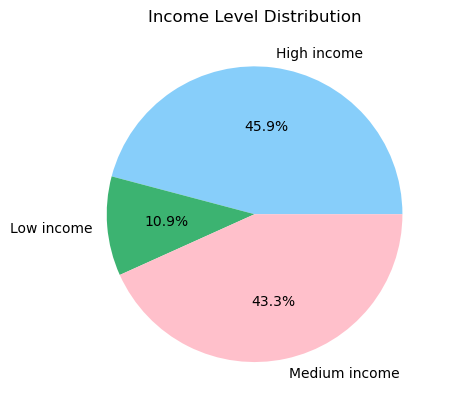

In [16]:
pie_income_level = plt.pie(income_level_frequency, labels=income_level_frequency.index, autopct='%1.1f%%', 
                           colors=['lightskyblue', 'mediumseagreen', 'pink'])
plt.title('Income Level Distribution')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'income_level_pie.png'))

In [17]:
# Create crosstab
avg_price_by_income_level = pd.crosstab(index=df_fin['income_level'], columns='Average Price', values= df_fin['prices'], aggfunc='mean')

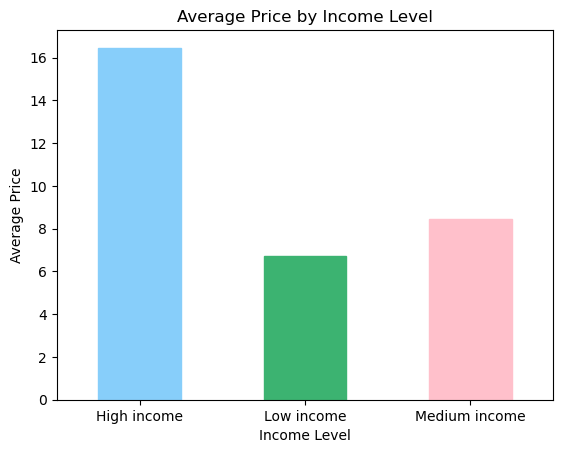

In [23]:
# Create bar chart for average price by income level
avg_price_by_income_bar = avg_price_by_income_level.plot(kind='bar', legend=None)
plt.title('Average Price by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
colors =['lightskyblue', 'mediumseagreen', 'pink']
for bar, color in zip(avg_price_by_income_bar.containers[0], colors):
    bar.set_color(color)
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'avg_price_per_income_level_bar.png'))

In [25]:
# Calculate the mean of prices by marital_status
avg_price_by_family_status = df_fin.groupby('family_status')['prices'].mean()

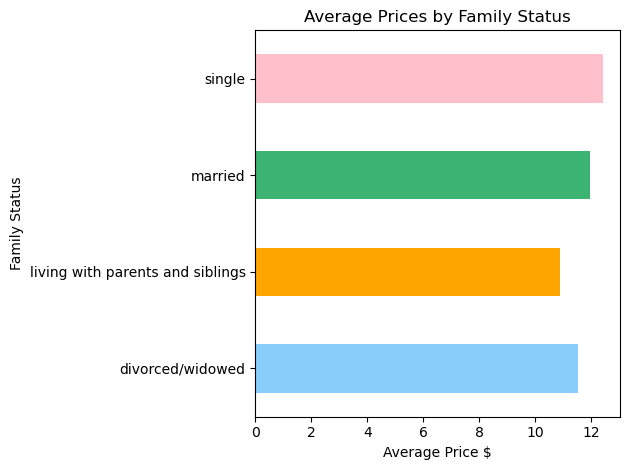

In [30]:
# Creating bar chart for average price by marital status
colors = ['lightskyblue', 'orange', 'mediumseagreen', 'pink']
bar_family_avg_price = avg_price_by_family_status.plot(kind = 'barh', stacked = False, color = colors)
plt.title('Average Prices by Family Status')
plt.xlabel('Average Price $')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'avg_price_per_family_bar.png'))

In [32]:
# Create age groups
df_fin['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [33]:
df_fin['age'].describe().apply(lambda x: format(x, 'f'))

count    30964564.000000
mean           49.468026
std            18.485279
min            18.000000
25%            33.000000
50%            49.000000
75%            65.000000
max            81.000000
Name: age, dtype: object

In [37]:
df_fin['age_group'] = 'Unknown'
df_fin.loc[(df_fin['age'] >= 18) & (df_fin['age'] <= 27), 'age_group'] = 'Gen Z'
df_fin.loc[(df_fin['age'] >= 28) & (df_fin['age'] <= 43), 'age_group'] = 'Millennial'
df_fin.loc[(df_fin['age'] >= 44) & (df_fin['age'] <= 59), 'age_group'] = 'Gen X'
df_fin.loc[(df_fin['age'] >= 60) & (df_fin['age'] <= 82), 'age_group'] = 'Boomers'

In [42]:
df_fin['family_status_age_group'] = df_fin['family_status'] + ', ' + df_fin['income_level'] + ', ' + df_fin['age_group']

In [43]:
df_fin['family_status_age_group'].value_counts()

family_status_age_group
married, High income, Boomers                             5549516
married, Medium income, Millennial                        4068171
married, High income, Gen X                               4060972
divorced/widowed, High income, Boomers                    1846202
married, Medium income, Gen Z                             1770339
married, Medium income, Boomers                           1717467
single, High income, Gen X                                1376974
single, Medium income, Millennial                         1349564
married, Medium income, Gen X                             1302118
living with parents and siblings, Medium income, Gen Z    1213082
single, Medium income, Gen Z                               976049
married, High income, Millennial                           914674
married, Low income, Millennial                            812870
married, Low income, Boomers                               662250
divorced/widowed, Medium income, Boomers            

In [47]:
# Group customer profiles and revenue
customer_profile_revenue = df_fin.groupby('family_status_age_group')['prices'].sum()
customer_profile_revenue_sorted = customer_profile_revenue.sort_values(ascending=False)

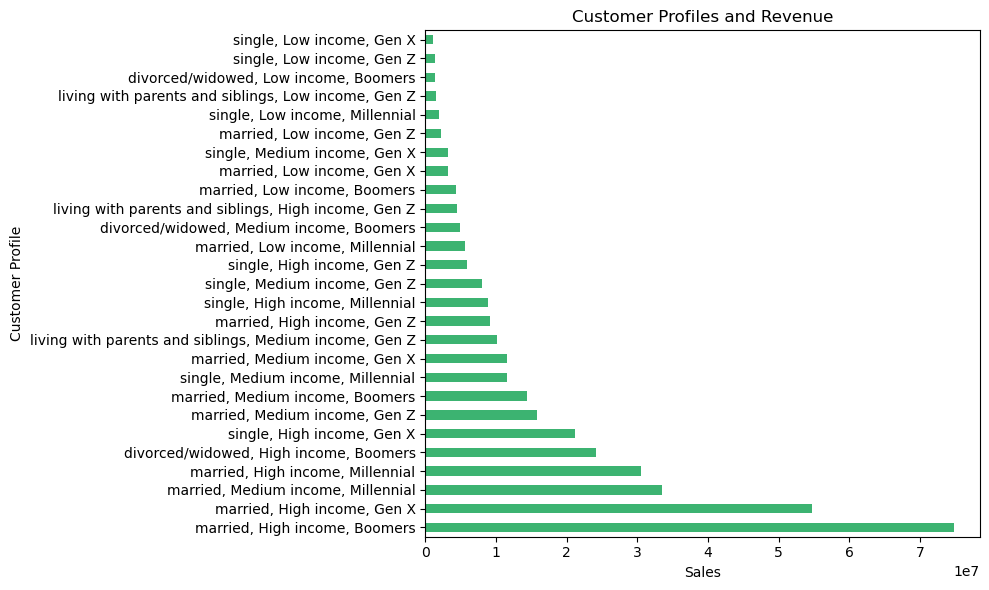

In [52]:
# Create bar chart
bar_customer_profile = customer_profile_revenue_sorted.plot.barh(title = 'Customer Profiles and Revenue', xlabel = 'Sales', 
                                                                 ylabel = 'Customer Profile', color = 'mediumseagreen')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'customer_profiles_bar.png'))

In [53]:
df_fin['gender'].value_counts()

gender
Male      15586740
Female    15377824
Name: count, dtype: int64

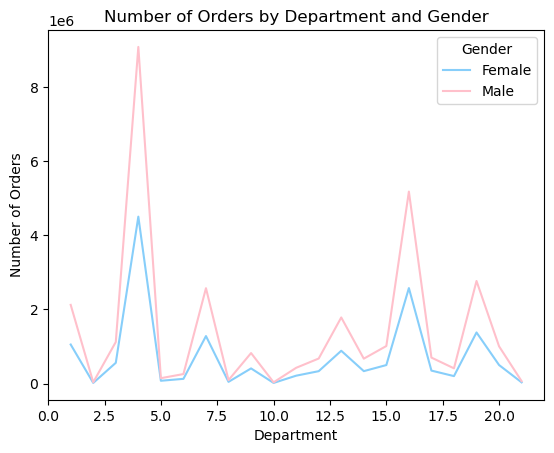

In [54]:
# Create a stacked line chart for order number by department and gender
region_department_orders = df_fin.groupby(['department_id', 'gender']).size().unstack()
region_department_line = region_department_orders.plot(kind = 'line', stacked = True,  color = ['lightskyblue', 'pink'])
plt.title('Number of Orders by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'gender_department_line.png'))

In [58]:
df_fin['department_id'].value_counts().sort_index()

department_id
1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: count, dtype: int64

In [63]:
# Maping deparment id to names
department_mapping = { 
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international', 
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta', 
    10: 'bulk',
    11: 'personal care', 
    12: 'meat seafood', 
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods', 
    16: 'dairy eggs', 
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing',
}

In [64]:
df_fin['department_name'] = df_fin['department_id'].map(department_mapping).fillna("missing")

In [67]:
df_fin[['department_name', 'gender']].value_counts()

department_name  gender
produce          Male      4577998
                 Female    4501275
dairy eggs       Male      2602521
                 Female    2574661
snacks           Male      1388550
                 Female    1377856
beverages        Male      1291517
                 Female    1280384
frozen           Male      1069252
                 Female    1052479
pantry           Male       898596
                 Female     884109
bakery           Male       561685
                 Female     559143
canned goods     Male       513573
deli             Male       504591
                 Female     499243
canned goods     Female     498501
dry goods pasta  Male       414037
                 Female     408099
household        Male       350925
                 Female     348932
meat seafood     Male       341297
breakfast        Male       336377
                 Female     334473
meat seafood     Female     333484
personal care    Male       212382
                 Female     211

In [96]:
gender_dept_group = df_fin.groupby(['department_name', 'gender']).size().unstack()
gender_dept_group_sorted = gender_dept_group.sort_values(by = 'Female', ascending = False)

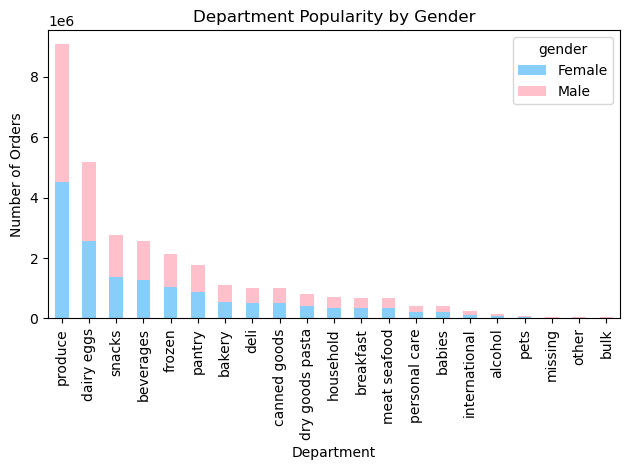

In [97]:
# Create bar chart
colors = ['lightskyblue', 'pink']
gender_dept_group_sorted = gender_dept_group_sorted.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity by Gender')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'gender_department_bar.png'))

In [103]:
loyal_deptartment_group = df_fin.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [104]:
loyal_deptartment_group = loyal_deptartment_group.sort_values(by = 'Regular customer', ascending = False)

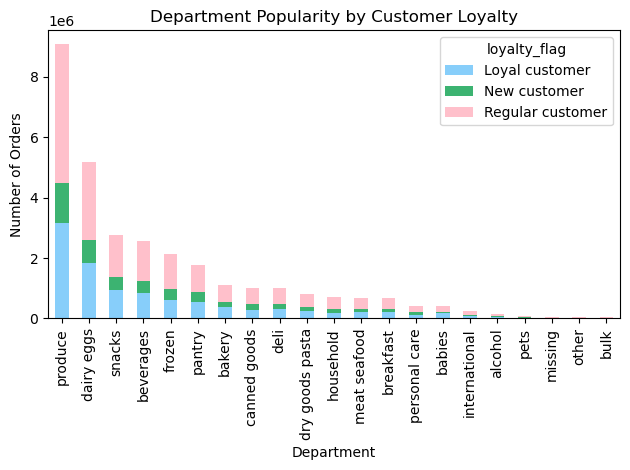

In [105]:
colors = ['lightskyblue', 'mediumseagreen','pink']
loyal_deptartment_group = loyal_deptartment_group.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity by Customer Loyalty')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'loyalty_department_bar.png'))